In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [7]:
train_files = glob.glob("./fingers/train/*.png")
test_files = glob.glob("./fingers/test/*.png")

print(len(train_files), len(test_files))

18000 3600


### Show an image and convert to array

In [8]:
train_files[0]

'./fingers/train/9e3cb712-4679-4e23-bc0f-fc0606e0ca58_5R.png'

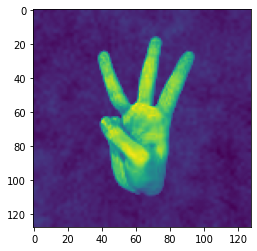

In [64]:
from PIL import Image
im = Image.open(train_files[0])
im2 = Image.open(test_files[1])
# plt.imshow(im)
plt.imshow(im2)

In [10]:
im_array = np.array(im)

In [11]:
im_array.shape

(128, 128)

### Load train and test data

In [12]:
X_train = np.zeros((len(train_files), 128, 128))
Y_train = np.zeros((len(train_files), 6))

In [13]:
for i, trf in enumerate(train_files):
    im = Image.open(trf)
    X_train[i, :, :] = np.array(im)
    Y_train[i, int(trf[-6:-5])] = 1

In [29]:
X_test = np.zeros((len(test_files), 128, 128))
Y_test = np.zeros((len(test_files), 6))

print(X_test.shape)

(3600, 128, 128)


In [30]:
for i, tsf in enumerate(test_files):
    if i == 0:
        print(tsf)
    im = Image.open(tsf)
    X_test[i, :, :] = np.array(im)
    Y_test[i, int(tsf[-6:-5])] = 1

./fingers/test/ceae20d5-c107-4c79-914e-4162e3d0e9f1_4L.png


In [31]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 18000
number of test examples = 3600
X_train shape: (18000, 128, 128, 1)
Y_train shape: (18000, 6)
X_test shape: (3600, 128, 128)
Y_test shape: (3600, 6)


### Train model

In [17]:
import tensorflow as tf

In [18]:
tf.__version__

'2.13.0-rc0'

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [66]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=(1, 1), input_shape = (128, 128, 1), padding='same', activation = 'relu'))
model.add(MaxPool2D((8,8)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(6, activation = 'softmax'))
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 6)                 150534    
                                                                 
Total params: 225030 (879.02 KB)
Trainable params: 225030 (879.02 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [68]:
model2 = Sequential()
model2.add(Conv2D(64, (3,3), strides=(1, 1), input_shape = (128, 128, 1), padding='same', activation = 'relu')) 
#filters, kernel size,  => output has same size as input
model2.add(MaxPool2D((8,8)))
model2.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
model2.add(Flatten())
model2.add(Dense(6, activation = 'softmax'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_5 (Dense)             (None, 6)                 196614    
                                                                 
Total params: 271110 (1.03 MB)
Trainable params: 271110 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

#### Scale data

In [21]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)/255
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)/255

In [22]:
X_train[0]

array([[[0.24313725],
        [0.23137255],
        [0.21568627],
        ...,
        [0.19607843],
        [0.19607843],
        [0.19607843]],

       [[0.24313725],
        [0.23137255],
        [0.20784314],
        ...,
        [0.18431373],
        [0.19215686],
        [0.19607843]],

       [[0.24705882],
        [0.23137255],
        [0.2       ],
        ...,
        [0.16470588],
        [0.18823529],
        [0.2       ]],

       ...,

       [[0.23137255],
        [0.22745098],
        [0.21960784],
        ...,
        [0.19607843],
        [0.20392157],
        [0.20784314]],

       [[0.21568627],
        [0.20784314],
        [0.2       ],
        ...,
        [0.19607843],
        [0.20784314],
        [0.21176471]],

       [[0.20392157],
        [0.2       ],
        [0.19215686],
        ...,
        [0.19607843],
        [0.20784314],
        [0.21568627]]])

In [24]:
model.compile('SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = X_train, y = Y_train, batch_size = 128, epochs = 10, validation_split=0.2)

Epoch 1/10
113/113 [==============================] - 19s 163ms/step - loss: 0.2436 - accuracy: 0.9374 - val_loss: 0.1435 - val_accuracy: 0.9694
Epoch 2/10
113/113 [==============================] - 19s 164ms/step - loss: 0.1483 - accuracy: 0.9592 - val_loss: 0.1084 - val_accuracy: 0.9731
Epoch 3/10
113/113 [==============================] - 19s 165ms/step - loss: 0.0993 - accuracy: 0.9745 - val_loss: 0.0970 - val_accuracy: 0.9728
Epoch 4/10
113/113 [==============================] - 18s 164ms/step - loss: 0.0786 - accuracy: 0.9797 - val_loss: 0.0705 - val_accuracy: 0.9794
Epoch 5/10
113/113 [==============================] - 18s 163ms/step - loss: 0.0670 - accuracy: 0.9812 - val_loss: 0.0598 - val_accuracy: 0.9853
Epoch 6/10
113/113 [==============================] - 19s 168ms/step - loss: 0.0601 - accuracy: 0.9824 - val_loss: 0.0581 - val_accuracy: 0.9817
Epoch 7/10
113/113 [==============================] - 19s 167ms/step - loss: 0.0756 - accuracy: 0.9801 - val_loss: 0.0518 - val_ac

In [33]:
Y_pred_test = model.predict(X_test)

113/113 [==============================] - 2s 14ms/step


#### Check model perfomance by looking at confusion matrix and classification report on the test data

In [42]:
from sklearn import metrics 

In [57]:
# print(len(Y_test), len(Y_pred_test))
# accuracy = 0
# print(Y_test[0], Y_pred_test[0])


print(metrics.confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred_test, axis=1)))
#  print(mtr.confusion_matrix(Y_test, Y_pred_test))

[[600   0   0   0   0   0]
 [  0 600   0   0   0   0]
 [  0   6 585   9   0   0]
 [  0   0  18 582   0   0]
 [  0   0   0   0 600   0]
 [  0   0   0   5   0 595]]


In [58]:
print(metrics.classification_report(np.argmax(Y_test, axis=1), np.argmax(Y_pred_test, axis=1), digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       600
           1      0.990     1.000     0.995       600
           2      0.970     0.975     0.973       600
           3      0.977     0.970     0.973       600
           4      1.000     1.000     1.000       600
           5      1.000     0.992     0.996       600

    accuracy                          0.989      3600
   macro avg      0.989     0.989     0.989      3600
weighted avg      0.989     0.989     0.989      3600



#### Convert and save model

In [59]:
cnn_model = model

In [60]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)

In [61]:
tflite_model = converter.convert()
open("converted_model_fingers_cnn.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/7q/rw8kqds90w39cxxfz15d3p9c0000gn/T/tmp9fedx08b/assets


INFO:tensorflow:Assets written to: /var/folders/7q/rw8kqds90w39cxxfz15d3p9c0000gn/T/tmp9fedx08b/assets
2023-05-13 17:02:11.450321: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-05-13 17:02:11.450347: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-05-13 17:02:11.450659: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/7q/rw8kqds90w39cxxfz15d3p9c0000gn/T/tmp9fedx08b
2023-05-13 17:02:11.451225: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-05-13 17:02:11.451232: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/7q/rw8kqds90w39cxxfz15d3p9c0000gn/T/tmp9fedx08b
2023-05-13 17:02:11.452519: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-05-13 17:02:11.453075: I tensorflow/cc/saved_model/load

902928